<a href="https://colab.research.google.com/github/idhamari/sim_synth_data/blob/main/1_Generating_random_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import pdb
import numpy as np

## source code = https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/samples_generator.py

## How to use a pseudo random number generator?

### a pseudorandom number generator uses a deterministic process to generate a series of pseudorandom numbers. this is good enough for machine learning and synthetic data production

In [2]:
from random import seed, random

In [3]:
seed(17)
for i in range(10):
    print(random())

0.5219839097124932
0.8066907771186791
0.9604947743238768
0.2896253777644655
0.7661074377979527
0.7042198668434126
0.6613830572238304
0.11016204891721182
0.026936778790526805
0.3841711045442975


In [4]:
seed(17)
for i in range(10):
    print(random())

0.5219839097124932
0.8066907771186791
0.9604947743238768
0.2896253777644655
0.7661074377979527
0.7042198668434126
0.6613830572238304
0.11016204891721182
0.026936778790526805
0.3841711045442975


## Exercise: what kind of distribution is generated?

(array([ 93.,  93., 118., 115., 101., 102.,  76., 102.,  89., 111.]),
 array([7.04233895e-05, 9.99080816e-02, 1.99745740e-01, 2.99583398e-01,
        3.99421056e-01, 4.99258714e-01, 5.99096372e-01, 6.98934031e-01,
        7.98771689e-01, 8.98609347e-01, 9.98447005e-01]),
 <BarContainer object of 10 artists>)

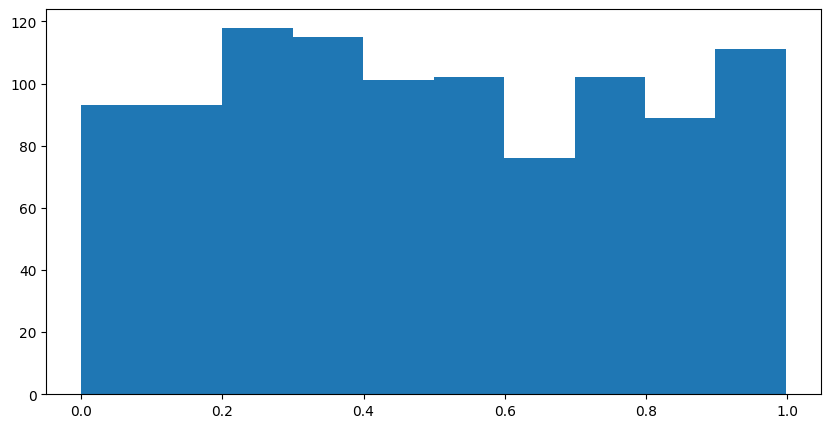

In [5]:
samples = [random() for i in range(1000)]
plt.hist(samples)

## Where do these random numbers come from?

#### Wichmann Hill pseudorandom number generator

In [6]:
# # https://github.com/python/cpython/blob/2.7/Lib/random.py
# # https://en.wikipedia.org/wiki/Wichmann%E2%80%93Hill
# def random(self):
#     """Get the next random number in the range [0.0, 1.0)."""
#     # Wichman-Hill random number generator.
#     #
#     # Wichmann, B. A. & Hill, I. D. (1982)
#     # Algorithm AS 183:
#     # An efficient and portable pseudo-random number generator
#     # Applied Statistics 31 (1982) 188-190
#     #
#     # see also:
#     #        Correction to Algorithm AS 183
#     #        Applied Statistics 33 (1984) 123
#     #
#     #        McLeod, A. I. (1985)
#     #        A remark on Algorithm AS 183
#     #        Applied Statistics 34 (1985),198-200

#     # This part is thread-unsafe:
#     # BEGIN CRITICAL SECTION
#     x, y, z = self._seed
#     x = (171 * x) % 30269
#     y = (172 * y) % 30307
#     z = (170 * z) % 30323
#     self._seed = x, y, z
#     # END CRITICAL SECTION

#     # Note:  on a platform using IEEE-754 double arithmetic, this can
#     # never return 0.0 (asserted by Tim; proof too long for a comment).
#     return (x/30269.0 + y/30307.0 + z/30323.0) % 1.0

### from the operating system

In [7]:
# # https://github.com/python/cpython/blob/2.7/Lib/random.py
# from binascii import hexlify as _hexlify
# from os import urandom as _urandom
# BPF = 53        # Number of bits in a float
# RECIP_BPF = 2**-BPF
# # x >> y
# # Returns x with the bits shifted to the right by y places. This is the same as //'ing x by 2**y.
# def random(self):
#     """Get the next random number in the range [0.0, 1.0)."""
#     return (long(_hexlify(_urandom(7)), 16) >> 3) * RECIP_BPF

## What if you want integers?

In [8]:
from random import randint
randint(1, 10)

8

### source code

In [9]:
# # https://github.com/python/cpython/blob/2.7/Lib/random.py
# # BPF = bits per float
# def randrange(self, start, stop=None, step=1, _int=int):  _maxwidth=(1L<<BPF)):
#     """Choose a random item from range(start, stop[, step]).
#     This fixes the problem with randint() which includes the
#     endpoint; in Python this is usually not what you want.
#     """

#     # This code is a bit messy to make it fast for the
#     # common case while still doing adequate error checking.
#     istart = _int(start)
#     if istart != start:
#         raise ValueError, "non-integer arg 1 for randrange()"
#     if stop is None:
#         if istart > 0:
#             if istart >= _maxwidth:
#                 return self._randbelow(istart)
#             return _int(self.random() * istart)
#         raise ValueError, "empty range for randrange()"

#     # stop argument supplied.
#     istop = _int(stop)
#     if istop != stop:
#         raise ValueError, "non-integer stop for randrange()"
#     width = istop - istart
#     if step == 1 and width > 0:
#         # Note that
#         #     int(istart + self.random()*width)
#         # instead would be incorrect.  For example, consider istart
#         # = -2 and istop = 0.  Then the guts would be in
#         # -2.0 to 0.0 exclusive on both ends (ignoring that random()
#         # might return 0.0), and because int() truncates toward 0, the
#         # final result would be -1 or 0 (instead of -2 or -1).
#         #     istart + int(self.random()*width)
#         # would also be incorrect, for a subtler reason:  the RHS
#         # can return a long, and then randrange() would also return
#         # a long, but we're supposed to return an int (for backward
#         # compatibility).

#         if width >= _maxwidth:
#             return _int(istart + self._randbelow(width))
#         return _int(istart + _int(self.random()*width)) ### THE USUAL USE CASE
#     if step == 1:
#         raise ValueError, "empty range for randrange() (%d,%d, %d)" % (istart, istop, width)

#     # Non-unit step argument supplied.
#     istep = _int(step)
#     if istep != step:
#         raise ValueError, "non-integer step for randrange()"
#     if istep > 0:
#         n = (width + istep - 1) // istep
#     elif istep < 0:
#         n = (width + istep + 1) // istep
#     else:
#         raise ValueError, "zero step for randrange()"

#     if n <= 0:
#         raise ValueError, "empty range for randrange()"

#     if n >= _maxwidth:
#         return istart + istep*self._randbelow(n)
#     return istart + istep*_int(self.random() * n)

# def randint(self, a, b):
#     """Return random integer in range [a, b], including both end points.
#     """

#     return self.randrange(a, b+1)

### other distributions are also available

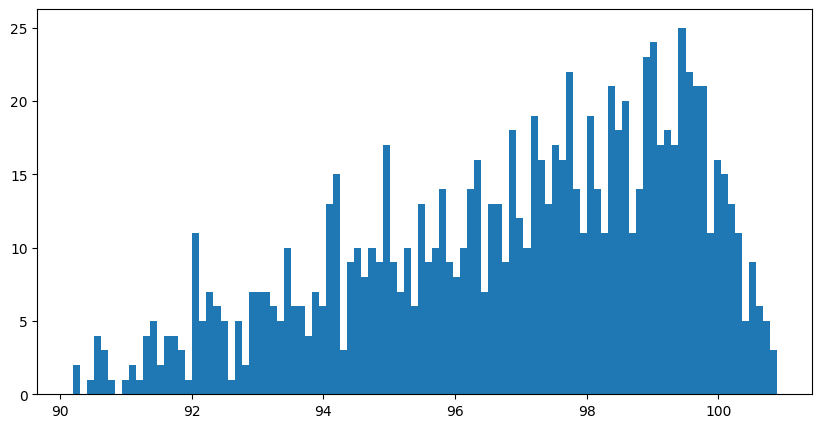

In [10]:
from random import triangular
fig = plt.hist([triangular(90, 101, 100) for i in range(1000)], bins = 100)

### source code

In [11]:
# # https://github.com/python/cpython/blob/2.7/Lib/random.py
# def scratch_triangular(self, low=0.0, high=1.0, mode=None):
#     """Triangular distribution.
#     Continuous distribution bounded by given lower and upper limits,
#     and having a given mode value in-between.
#     http://en.wikipedia.org/wiki/Triangular_distribution
#     """
#     u = self.random()
#     try:
#         c = 0.5 if mode is None else (mode - low) / (high - low)
#     except ZeroDivisionError:
#         return low
#     if u > c:
#         u = 1.0 - u
#         c = 1.0 - c
#         low, high = high, low
#     return low + (high - low) * (u * c) ** 0.5


#### let's work through this

In [12]:
low  =  0.0 
high =  1.0
mode = 0.25
u    = random()
c = 0.5 if mode is None else (mode - low) / (high - low)

print("u is ", u)
print("c is ", c)

if u > c:
    u = 1.0 - u
    c = 1.0 - c
    
    print("u is ", u)
    print("c is ", c)
    
    low, high = high, low

print("high - low is ", high - low)
print("(high - low) * (u * c) ** 0.5 is", (high - low) * (u * c) ** 0.5)
low + (high - low) * (u * c) ** 0.5


u is  0.3753851394066471
c is  0.25
u is  0.6246148605933529
c is  0.75
high - low is  -1.0
(high - low) * (u * c) ** 0.5 is -0.6844422148326437


0.31555778516735633

## What about a Gaussian/normal distribution?

In [13]:
from random import gauss
gauss(0.0, 1.0)

-0.8623511324251987

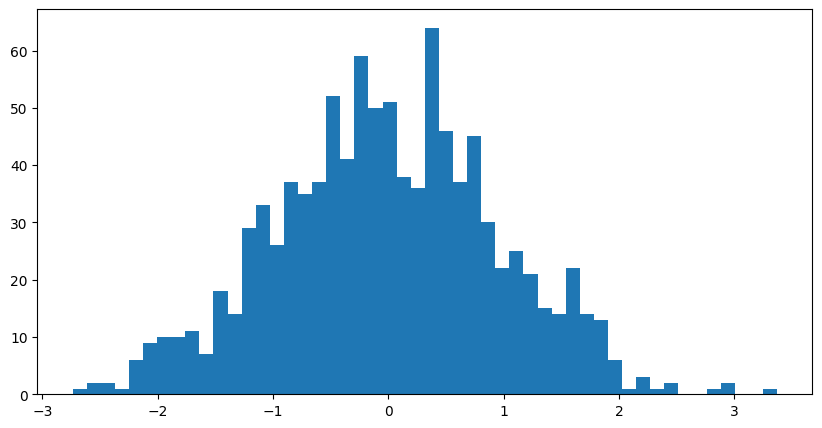

In [14]:
gif = plt.hist([gauss(0.0, 1.0) for i in range(1000)], bins = 50)

In [15]:
# # https://github.com/python/cpython/blob/2.7/Lib/random.py
# def gauss(self, mu, sigma):
#     """Gaussian distribution.
#     mu is the mean, and sigma is the standard deviation.  This is
#     slightly faster than the normalvariate() function.
#     Not thread-safe without a lock around calls.
#     """

#     # When x and y are two variables from [0, 1), uniformly
#     # distributed, then
#     #
#     #    cos(2*pi*x)*sqrt(-2*log(1-y))
#     #    sin(2*pi*x)*sqrt(-2*log(1-y))
#     #
#     # are two *independent* variables with normal distribution
#     # (mu = 0, sigma = 1).
#     # (Lambert Meertens)
#     # (corrected version; bug discovered by Mike Miller, fixed by LM)


#     random = self.random
#     z = self.gauss_next
#     self.gauss_next = None
#     if z is None:
#         x2pi = random() * TWOPI
#         g2rad = _sqrt(-2.0 * _log(1.0 - random()))
#         z = _cos(x2pi) * g2rad
#         self.gauss_next = _sin(x2pi) * g2rad

#     return mu + z*sigma


## Gamma distribution

In [16]:
# # we are not going to read this in detail!
# def gammavariate(self, alpha, beta):
#     """Gamma distribution.  Not the gamma function!
#     Conditions on the parameters are alpha > 0 and beta > 0.
#     The probability distribution function is:
#                 x ** (alpha - 1) * math.exp(-x / beta)
#       pdf(x) =  --------------------------------------
#                   math.gamma(alpha) * beta ** alpha
#     """

#     # alpha > 0, beta > 0, mean is alpha*beta, variance is alpha*beta**2

#     # Warning: a few older sources define the gamma distribution in terms
#     # of alpha > -1.0
#     if alpha <= 0.0 or beta <= 0.0:
#         raise ValueError, 'gammavariate: alpha and beta must be > 0.0'

#     random = self.random
#     if alpha > 1.0:

#         # Uses R.C.H. Cheng, "The generation of Gamma
#         # variables with non-integral shape parameters",
#         # Applied Statistics, (1977), 26, No. 1, p71-74

#         ainv = _sqrt(2.0 * alpha - 1.0)
#         bbb = alpha - LOG4
#         ccc = alpha + ainv

#         while 1:
#             u1 = random()
#             if not 1e-7 < u1 < .9999999:
#                 continue
#             u2 = 1.0 - random()
#             v = _log(u1/(1.0-u1))/ainv
#             x = alpha*_exp(v)
#             z = u1*u1*u2
#             r = bbb+ccc*v-x
#             if r + SG_MAGICCONST - 4.5*z >= 0.0 or r >= _log(z):
#                 return x * beta

#     elif alpha == 1.0:
#         # expovariate(1)
#         u = random()
#         while u <= 1e-7:
#             u = random()
#         return -_log(u) * beta

#     else:   # alpha is between 0 and 1 (exclusive)

#         # Uses ALGORITHM GS of Statistical Computing - Kennedy & Gentle

#         while 1:
#             u = random()
#             b = (_e + alpha)/_e
#             p = b*u
#             if p <= 1.0:
#                 x = p ** (1.0/alpha)
#             else:
#                 x = -_log((b-p)/alpha)
#             u1 = random()
#             if p > 1.0:
#                 if u1 <= x ** (alpha - 1.0):
#                     break
#             elif u1 <= _exp(-x):
#                 break
#         return x * beta

# # note that the beta distribution in turn is built off gamma distribution in code + in math
# # https://math.stackexchange.com/questions/190670/how-exactly-are-the-beta-and-gamma-distributions-related
# # and mistakes were made:
# # https://mail.python.org/pipermail/python-bugs-list/2001-January/003752.html

##  Use your operating system directly

In [17]:
import os
rand_bytes = os.urandom(5)
print(rand_bytes)

b'\xb8\xf6Fjt'


In [18]:
type(rand_bytes)

bytes

In [19]:
# big endian v. little endian
int.from_bytes(rand_bytes, byteorder = 'big')

794405792372

In [20]:
int.from_bytes(rand_bytes, byteorder = 'little')

499999241912

## How to make correlated data?

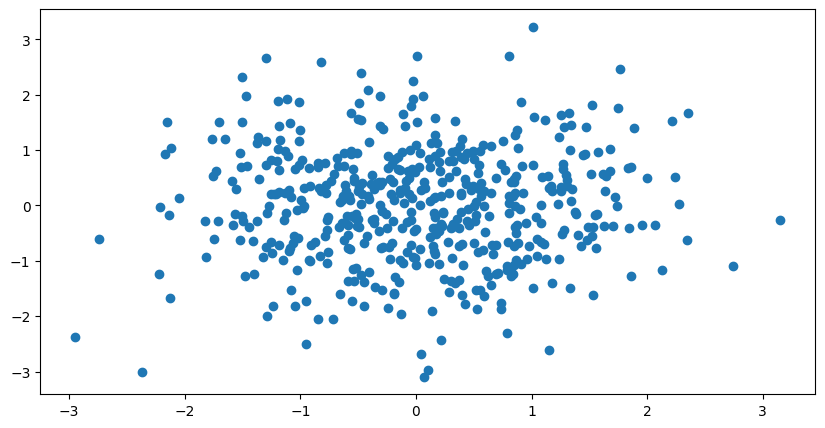

In [21]:
rand_vals = np.random.normal(size = [500, 2])
cor = 0.0 # -0.5
cov_mat = np.array([[1.0, cor], [cor, 1.0]])
correlated = np.dot(rand_vals, cov_mat)
plt.scatter(correlated[:, 0], correlated[:, 1])